In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
from query_engine import VehiclePositions

In [46]:
vp = VehiclePositions()

In [75]:
route_id = "12"

columns = ["time", "route_id", "vehicle_id", "latitude", "longitude", "speed"]
results = vp.query(columns_to_return=columns, where_clause= f"route_id='{route_id}'")

Executing Query...
	
        SELECT DISTINCT time, route_id, vehicle_id, latitude, longitude, speed
        FROM "gtfs_data"."vehicle_positions"
        WHERE route_id='12'
        


In [76]:
results

,time,route_id,vehicle_id,latitude,longitude,speed
0,2024-11-27 02:27:54,12,8766,37.792862,-122.395302,5.28
1,2024-11-27 02:30:29,12,8907,37.782433,-122.397751,0.00
2,2024-11-27 02:42:37,12,8907,37.768337,-122.415718,0.00
3,2024-11-27 02:21:58,12,8908,37.770935,-122.412239,0.00
4,2024-11-27 02:28:41,12,8908,37.763939,-122.415268,0.83
...,...,...,...,...,...,...
4358,2024-11-28 00:02:42,12,8960,37.792595,-122.394302,2.22
4359,2024-11-28 00:10:28,12,8960,37.786572,-122.395470,0.00
4360,2024-11-28 00:18:28,12,8923,37.753880,-122.414192,3.06
4361,2024-11-28 00:12:32,12,8933,37.794674,-122.423073,0.00


In [77]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [78]:
# Import street map
street_map = gpd.read_file("maps/city-of-san-francisco-california-streets.shp")

# Zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(results["longitude"], results["latitude"])]

# Create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(results,
    crs = 'EPSG:4326',
    geometry = geometry
)
geo_df

,time,route_id,vehicle_id,latitude,longitude,speed,geometry
0,2024-11-27 02:27:54,12,8766,37.792862,-122.395302,5.28,POINT (-122.3953 37.79286)
1,2024-11-27 02:30:29,12,8907,37.782433,-122.397751,0.00,POINT (-122.39775 37.78243)
2,2024-11-27 02:42:37,12,8907,37.768337,-122.415718,0.00,POINT (-122.41572 37.76834)
3,2024-11-27 02:21:58,12,8908,37.770935,-122.412239,0.00,POINT (-122.41224 37.77094)
4,2024-11-27 02:28:41,12,8908,37.763939,-122.415268,0.83,POINT (-122.41527 37.76394)
...,...,...,...,...,...,...,...
4358,2024-11-28 00:02:42,12,8960,37.792595,-122.394302,2.22,POINT (-122.3943 37.79259)
4359,2024-11-28 00:10:28,12,8960,37.786572,-122.395470,0.00,POINT (-122.39547 37.78657)
4360,2024-11-28 00:18:28,12,8923,37.753880,-122.414192,3.06,POINT (-122.41419 37.75388)
4361,2024-11-28 00:12:32,12,8933,37.794674,-122.423073,0.00,POINT (-122.42307 37.79467)


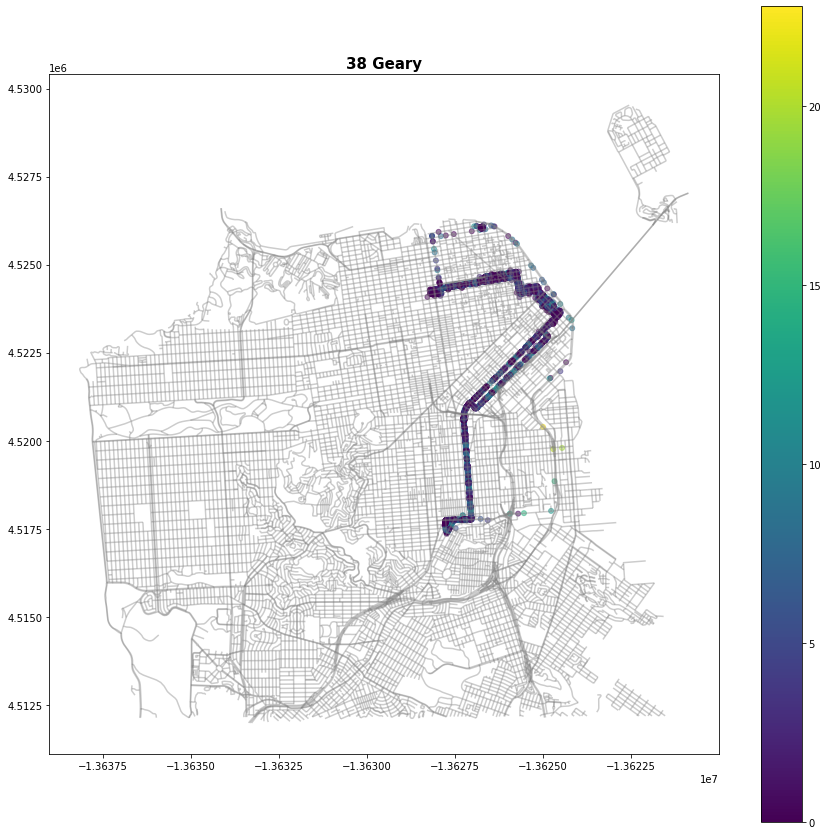

In [79]:
# Create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

# Add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color="grey")

# Reproject the points GeoDataFrame to match the shapefile CRS
geo_df = geo_df.to_crs(street_map.crs)
                
# Add geodataframe to axes
geo_df.plot(column="speed", ax=ax, markersize=25, alpha=0.5, legend=True)

plt.title("38 Geary", fontsize=15,fontweight="bold")

plt.show()

In [67]:
print(street_map.crs)

EPSG:3395
